In [ ]:
import pandas as pd

# Load datasets
train_df = pd.read_csv('train.csv')
features_df = pd.read_csv('features.csv')
stores_df = pd.read_csv('stores.csv')
test_df = pd.read_csv('test.csv')
submission_df = pd.read_csv('sampleSubmission.csv')


print("Train dataset shape:", train_df.shape)
print("Features dataset shape:", features_df.shape)
print("Stores dataset shape:", stores_df.shape)
print("Test dataset shape:", test_df.shape)
print("Submission dataset shape:", submission_df.shape)


In [ ]:
# Merge train datasets
dataset = train_df.merge(stores_df, how='left').merge(features_df, how='left')

# Merge test datasets
test_dataset = test_df.merge(stores_df, how='left').merge(features_df, how='left')

# Display merged dataset shapes
print("Training dataset shape:", dataset.shape)
print("Testing dataset shape:", test_dataset.shape)


Training dataset shape: (421570, 16)
Testing dataset shape: (115064, 15)


In [ ]:
dataset.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,0.042851,False,0,151315,0.434149,0.050100,0.117124,0.060900,0.001724,0.035664,0.059199,0.840500,0.405118
277665,29,5,2010-02-05,0.029425,False,1,93638,0.258513,0.158317,0.062964,0.002565,0.000222,0.005899,0.002408,0.054008,0.592774
277808,29,6,2010-02-05,0.011731,False,1,93638,0.258513,0.158317,0.062964,0.002565,0.000222,0.005899,0.002408,0.054008,0.592774
277951,29,7,2010-02-05,0.022646,False,1,93638,0.258513,0.158317,0.062964,0.002565,0.000222,0.005899,0.002408,0.054008,0.592774
278094,29,8,2010-02-05,0.035876,False,1,93638,0.258513,0.158317,0.062964,0.002565,0.000222,0.005899,0.002408,0.054008,0.592774
16451,2,49,2010-02-05,0.029733,False,0,202307,0.413405,0.050100,0.069403,0.003775,0.001617,0.004032,0.025732,0.837102,0.426011
278237,29,9,2010-02-05,0.013478,False,1,93638,0.258513,0.158317,0.062964,0.002565,0.000222,0.005899,0.002408,0.054008,0.592774
278380,29,10,2010-02-05,0.017963,False,1,93638,0.258513,0.158317,0.062964,0.002565,0.000222,0.005899,0.002408,0.054008,0.592774
278523,29,11,2010-02-05,0.017123,False,1,93638,0.258513,0.158317,0.062964,0.002565,0.000222,0.005899,0.002408,0.054008,0.592774
278666,29,12,2010-02-05,0.010432,False,1,93638,0.258513,0.158317,0.062964,0.002565,0.000222,0.005899,0.002408,0.054008,0.592774


In [ ]:
# Fill missing values with forward fill, backward fill, and then fallback to 0
dataset.fillna(method='ffill', inplace=True)
dataset.fillna(method='bfill', inplace=True)
dataset.fillna(0, inplace=True)

test_dataset.fillna(method='ffill', inplace=True)
test_dataset.fillna(method='bfill', inplace=True)
test_dataset.fillna(0, inplace=True)

# Check for any remaining missing values
print("Missing values in training dataset:\n", dataset.isnull().sum())
print("Missing values in testing dataset:\n", test_dataset.isnull().sum())


Missing values in training dataset:
 Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64
Missing values in testing dataset:
 Store           0
Dept            0
Date            0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64


/var/folders/77/xl1bx_sj1nqc214dbq2jptrw0000gp/T/ipykernel_92087/2337767660.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset.fillna(method='ffill', inplace=True)
/var/folders/77/xl1bx_sj1nqc214dbq2jptrw0000gp/T/ipykernel_92087/2337767660.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset.fillna(method='bfill', inplace=True)
/var/folders/77/xl1bx_sj1nqc214dbq2jptrw0000gp/T/ipykernel_92087/2337767660.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_dataset.fillna(method='ffill', inplace=True)
/var/folders/77/xl1bx_sj1nqc214dbq2jptrw0000gp/T/ipykernel_92087/2337767660.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj

In [ ]:
# Convert 'Date' to datetime and sort the data
dataset['Date'] = pd.to_datetime(dataset['Date'])
test_dataset['Date'] = pd.to_datetime(test_dataset['Date'])

dataset.sort_values(by='Date', inplace=True)
test_dataset.sort_values(by='Date', inplace=True)

# Display a sample to verify the changes
print("Training dataset preview:\n", dataset.head())
print("Testing dataset preview:\n", test_dataset.head())


Training dataset preview:
         Store  Dept       Date  Weekly_Sales  IsHoliday Type    Size  \
0           1     1 2010-02-05      24924.50      False    A  151315   
277665     29     5 2010-02-05      15552.08      False    B   93638   
277808     29     6 2010-02-05       3200.22      False    B   93638   
277951     29     7 2010-02-05      10820.05      False    B   93638   
278094     29     8 2010-02-05      20055.64      False    B   93638   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0             42.31       2.572    10382.9    6115.67     215.07    2406.62   
277665        24.36       2.788     5581.8       2.98       2.28     398.23   
277808        24.36       2.788     5581.8       2.98       2.28     398.23   
277951        24.36       2.788     5581.8       2.98       2.28     398.23   
278094        24.36       2.788     5581.8       2.98       2.28     398.23   

        MarkDown5         CPI  Unemployment  
0         6551.42  

In [ ]:
# Identify categorical columns
categorical_columns = dataset.select_dtypes(include=['object', 'category']).columns
#print("Categorical columns in training dataset:", categorical_columns)

# Factorize categorical columns
for col in categorical_columns:
    dataset[col] = pd.factorize(dataset[col])[0]
    test_dataset[col] = pd.factorize(test_dataset[col])[0]

# Verify no object columns remain
print("Training dataset data types:\n", dataset.dtypes)
print("Testing dataset data types:\n", test_dataset.dtypes)


Training dataset data types:
 Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Type                     int64
Size                     int64
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
dtype: object
Testing dataset data types:
 Store                    int64
Dept                     int64
Date            datetime64[ns]
IsHoliday                 bool
Type                     int64
Size                     int64
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Define numerical columns (excluding Weekly_Sales)
numerical_columns = ['Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
                     'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']

scaler = MinMaxScaler()

# Fit scaler on training features only (excluding Weekly_Sales)
dataset[numerical_columns] = scaler.fit_transform(dataset[numerical_columns])

# Apply the same scaler to test features
test_dataset[numerical_columns] = scaler.transform(test_dataset[numerical_columns])

# Normalize the target column (Weekly_Sales) separately for the training dataset
scaler_target = MinMaxScaler()
dataset['Weekly_Sales'] = scaler_target.fit_transform(dataset[['Weekly_Sales']])

# Verify scaling
print("Training dataset preview after scaling:\n", dataset.head())
print("Testing dataset preview after scaling:\n", test_dataset.head())



Training dataset preview after scaling:
         Store  Dept       Date  Weekly_Sales  IsHoliday  Type    Size  \
0           1     1 2010-02-05      0.042851      False     0  151315   
277665     29     5 2010-02-05      0.029425      False     1   93638   
277808     29     6 2010-02-05      0.011731      False     1   93638   
277951     29     7 2010-02-05      0.022646      False     1   93638   
278094     29     8 2010-02-05      0.035876      False     1   93638   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0          0.434149    0.050100   0.117124   0.060900   0.001724   0.035664   
277665     0.258513    0.158317   0.062964   0.002565   0.000222   0.005899   
277808     0.258513    0.158317   0.062964   0.002565   0.000222   0.005899   
277951     0.258513    0.158317   0.062964   0.002565   0.000222   0.005899   
278094     0.258513    0.158317   0.062964   0.002565   0.000222   0.005899   

        MarkDown5       CPI  Unemployment  
0

In [ ]:
import numpy as np


sequence_length = 10


features = dataset.drop(columns=['Weekly_Sales', 'Date'])  
target = dataset['Weekly_Sales']

X, y = [], []
for i in range(len(features) - sequence_length):
    X.append(features.iloc[i:i + sequence_length].values)
    y.append(target.iloc[i + sequence_length])

# Convert to NumPy arrays
X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.float32)

# Verify the shape of the data
print("Input shape (X):", X.shape)  
print("Target shape (y):", y.shape)  


Input shape (X): (421560, 10, 14)
Target shape (y): (421560,)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm the shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (337248, 10, 14)
X_test shape: (84312, 10, 14)
y_train shape: (337248,)
y_test shape: (84312,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import Dropout

# Define the LSTM model
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),  # Dropout layer
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Display the model architecture
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 10, 100)        │        46,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,501 (302.74 KB)

 Trainable params: 77,501 (302.74 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,  
    epochs=10,             
    batch_size=32,         
    verbose=1
)

# Save the trained model
model.save('sales_forecasting_lstm.h5')


Epoch 1/10
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 48s 5ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2/10
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 48s 6ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3/10
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 50s 6ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4/10
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 52s 6ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 5/10
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 46s 5ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 6/10
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 48s 6ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 7/10
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 48s 6ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 8/10
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 46s 5ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 9/10
8432/8432 ━━━━━━━━━━━

2635/2635 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.0011 - mse: 0.0011
Test Loss: 0.0010673202341422439, Test MSE: 0.0010673202341422439
2635/2635 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


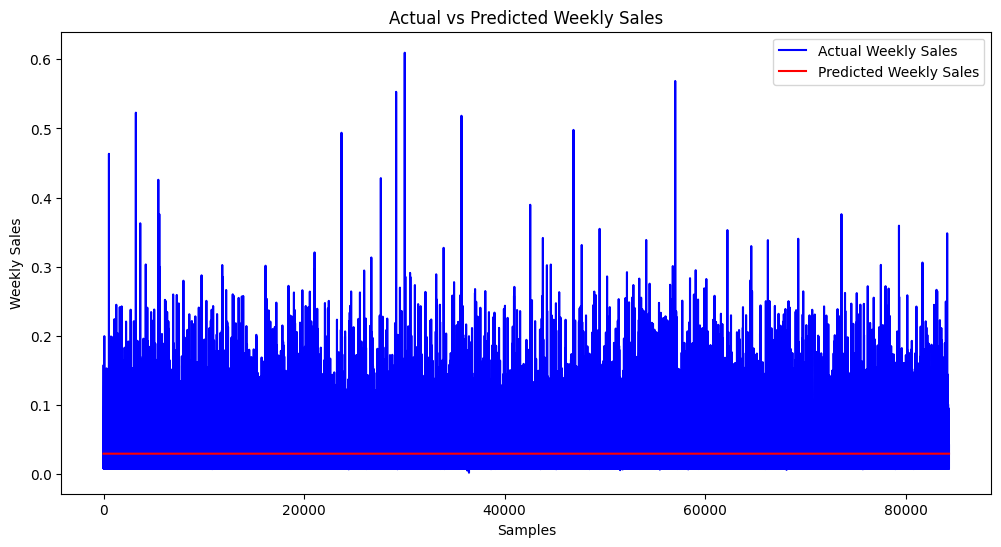

In [ ]:
# Evaluate on the test set
test_loss, test_mse = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss}, Test MSE: {test_mse}")

# Predict on the test set
y_pred = model.predict(X_test)

# Rescale the predictions back to the original scale
y_pred_rescaled = scaler_target.inverse_transform(y_pred)
y_test_rescaled = scaler_target.inverse_transform(y_test.reshape(-1, 1))

# Display predictions vs actual values
import matplotlib.pyplot as plt

